In [5]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from nltk.corpus import brown
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [255]:
import nltk
from nltk.corpus import stopwords

In [256]:
stop_words = set(stopwords.words("english"))

# Version 1

https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pandas as pd

In [237]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [29]:
df = pd.read_csv("../../datasets/currently_dataset/song_decades_long.csv")

In [30]:
df.head(2)

,Unnamed: 0,artist,decades,text,stemmed_text,POS,Genre1,genre1,number_of_tokens,number_of_types
0,0,"""Weird Al"" Yankovic",1980s,potato skins potato cakes hash browns and i...,potato skin potato cake hash brown and instan...,french plain enough greasy sour lumpy tough en...,Rock,antiviral pop,12745.0,2264.0
1,37,"""Weird Al"" Yankovic",1990s,as i walk through the valley where i harvest m...,as i walk through the valley where i harvest ...,plain perfect fancy amish amish hard amish ami...,Rock,antiviral pop,10803.0,2317.0


In [4]:
documents = df.text

In [5]:
documents

0       potato skins  potato cakes  hash browns  and i...
1       as i walk through the valley where i harvest m...
2       jillian was her name  she was sweeter than asp...
3       my mama told me when i was hatched  act like a...
4       here we go      here we go  one more time  eve...
                              ...                        
1033    you know i like my chicken fried  cold beer on...
1034    we never spoke a word  but every thought she h...
1035    well you're walking on the moon  but there's n...
1036    i lie awake  i've gone to ground  i'm watching...
1037    everybody's worried about time  but i just kee...
Name: text, Length: 1038, dtype: object

In [242]:
no_features = 1000
no_topics = 20
n_components = 10
n_top_words = 20

In [261]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=stop_words)
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [262]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=stop_words)
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [263]:
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [264]:
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [265]:
no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)
#display_topics(lda, tf_feature_names, no_top_words)

Topic #0: man night day good way world love know old say life light little go head mind get one last everything
Topic #1: nigga shit bitch fuck ai ass money niggas wit get hood verse hook niggaz pussy fucking fuckin know man game
Topic #2: baby love honey somebody want ready know ai girl good crazy need thing lovin right sweet nobody little heart gimme
Topic #3: love need know heart feel night say life world true chance baby lonely someone want happy enough day way goodbye
Topic #4: ai good nothin nobody old tryin money talkin roll man know ride band job cowboy honey nothing miss ol boy
Topic #5: doo takin feelin welcome happy hate cherry somethin man stuff skin run good heartbeat think bad jump road number something
Topic #6: girl daddy ai party world club body tryna sexy want bad gon favorite like think kiss ceiling love young brown
Topic #7: want need say real enough party wish gimme thing everything like today end think alone much control get beautiful truth
Topic #8: tonight night

mit POS

In [266]:
documents = df.POS

In [267]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=stop_words)
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [268]:
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [269]:
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [270]:
no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic #0: man night day good way world love know old say life light little go head mind get one last everything
Topic #1: nigga shit bitch fuck ai ass money niggas wit get hood verse hook niggaz pussy fucking fuckin know man game
Topic #2: baby love honey somebody want ready know ai girl good crazy need thing lovin right sweet nobody little heart gimme
Topic #3: love need know heart feel night say life world true chance baby lonely someone want happy enough day way goodbye
Topic #4: ai good nothin nobody old tryin money talkin roll man know ride band job cowboy honey nothing miss ol boy
Topic #5: doo takin feelin welcome happy hate cherry somethin man stuff skin run good heartbeat think bad jump road number something
Topic #6: girl daddy ai party world club body tryna sexy want bad gon favorite like think kiss ceiling love young brown
Topic #7: want need say real enough party wish gimme thing everything like today end think alone much control get beautiful truth
Topic #8: tonight night

In [271]:
lda.fit(tf)


print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
display_topics(lda, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0: hand little man know baby flow ai dream heart night love want face one big day way goin fat good
Topic #1: sword bottle trip buy track get hurry seat hot love plane ready lot tree mad bloody lightning follow honey night
Topic #2: oo ride single pistol cool slide love poor desert ai world gentle home young life heart holiday band go name
Topic #3: life world heart way know love name day light night soul one blood fire nothing pain free feel mind see
Topic #4: big hand woman dream gun man blue road job fat talkin baby flow ai die water island air little high
Topic #5: man way little know day good old ai night love life want world mind head say town get go one
Topic #6: doo dance jump baby ordinary love magic day ai little takin drum fire feelin girl run good cherry life like
Topic #7: old baby sword heart love night day ai want talkin world track get hot little cool know boy honey tonight
Topic #8: baby bad love lady night enough want man know heart someth

# Version 2

https://github.com/derekgreene/topic-model-tutorial

## Text Preprocessing

In [6]:
raw_documents = df['POS'].to_list()
print("Read %d raw text documents" % len(raw_documents)) #Laden der Daten

Read 1038 raw text documents


### Document-Term Matrix erstellen

In [7]:
import nltk
from nltk.corpus import stopwords

In [8]:
stop_words = set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [9]:
#custom_stop_words = stopwords
#with open( "stopwords.txt", "r", encoding="utf8" ) as fin:
    #for line in fin.readlines():
        #custom_stop_words.append( line.strip() )
# zur Kenntnis nehmen, dass wir es hashable machen müssen
print("Stopword list has %d entries" % len(stop_words))

Stopword list has 179 entries


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
# Verwendung einer benutzerdefinierten Stoppwortliste, setzen der Mindesthäufigkeit 
#von Term-Dokumenten auf 20
vectorizer = CountVectorizer(stop_words = stop_words, min_df = 1)
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Created 1038 X 22624 document-term matrix


In [12]:
A

<1038x22624 sparse matrix of type '<class 'numpy.int64'>'
	with 321643 stored elements in Compressed Sparse Row format>

### Vokabular für das Korpus aufbauen

In [200]:
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 22624 distinct terms


In [201]:
#Dokument-Begriffsmatrix, Begriffe und Schnipsel zur späteren Verwendung speichern, indem wir Joblib verwenden, 
#um die Daten zu persistieren.

from sklearn.externals import joblib
snippets = []
joblib.dump((A,terms,snippets), "articles-raw.pkl")

['articles-raw.pkl']

### Term-Gewichtung mit TF-IDF anwenden

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
# können die gleichen Vorverarbeitungsparameter übergeben
vectorizer = TfidfVectorizer(stop_words = stop_words, min_df = 1)
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]) )

Created 1038 X 22624 TF-IDF-normalized document-term matrix


In [14]:
A

<1038x22624 sparse matrix of type '<class 'numpy.float64'>'
	with 321643 stored elements in Compressed Sparse Row format>

In [15]:
# den sich ergebenden Wortschatz extrahieren
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 22624 distinct terms


In [16]:
import operator
def rank_terms( A, terms ):
    # die Summen über jede Spalte erhalten
    sums = A.sum(axis=0)
    # Gewichte den Begriffen zuordnen
    weights = {}
    for col, term in enumerate(terms):
        weights[term] = sums[0,col]
    # die Begriffe nach ihrem Gewicht über alle Dokumente einordnen
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [17]:
#Rangliste der 20 wichtigsten Begriffe, was einen sehr groben Eindruck vom Inhalt der Dokumentensammlung vermittelt.

ranking = rank_terms( A, terms )
for i, pair in enumerate( ranking[0:20] ):
    print( "%02d. %s (%.2f)" % ( i+1, pair[0], pair[1] ) )

01. love (128.35)
02. baby (82.32)
03. know (79.44)
04. time (69.67)
05. way (57.16)
06. want (56.35)
07. life (51.08)
08. heart (51.01)
09. ai (48.20)
10. night (44.89)
11. man (44.42)
12. girl (42.51)
13. little (40.45)
14. day (40.11)
15. world (39.26)
16. good (38.87)
17. need (36.50)
18. say (33.93)
19. tonight (30.33)
20. nothing (28.86)


In [206]:
#wieder Dokument-Begriffsmatrix, Begriffe und Schnipsel für die spätere Themenmodellierung mit Joblib speichern.

joblib.dump((A,terms,snippets), "articles-tfidf.pkl")

['articles-tfidf.pkl']

## NMF Themen-Modelle

Die Themenmodellierung zielt darauf ab, die verborgene thematische Struktur in einem großen Korpus von Textdokumenten automatisch zu entdecken. Ein Ansatz für die Themenmodellierung ist die Anwendung von Methoden der Matrixfaktorisierung, wie z.B. die Nicht-negative Matrixfaktorisierung (NMF). In diesem Notebook wird NMF unter Verwendung der Scikit-Lernbibliothek in Python angewendet.

## Anwendung von NMF

In [207]:
#die TF-IDF normalisierte Dokument-Begriffsmatrix und die Liste der Begriffe laden, 
#die wir vorher mit Joblib gespeichert haben.

from sklearn.externals import joblib
(A,terms,snippets) = joblib.load( "articles-tfidf.pkl" )
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Loaded 1038 X 22624 document-term matrix


In [19]:
#Der wichtigste Eingabeparameter für den NMF ist die Anzahl der zu generierenden Themen k.
#Zunächst wird ein geschätzter Wert verwendet.

k = 10

Ein anderer Grund für die Wahl für den NMF dreht sich um die Initialisierung. Am häufigsten wird beim NMF eine zufällige Initialisierung verwendet, um die Werte in den Faktoren W und H zu füllen. Je nach dem verwendeten Zufallssaatgut können Sie unterschiedliche Ergebnisse auf demselben Datensatz erhalten. Stattdessen liefert die Verwendung der SVD-basierten Initialisierung zuverlässigere Ergebnisse.

In [20]:
# das Modell erstellen
from sklearn import decomposition
model = decomposition.NMF( init="nndsvd", n_components=k ) 
# das Modell anwenden und die beiden Faktormatrizen extrahieren
W = model.fit_transform( A )
H = model.components_

In [27]:
def dominant_topics(ldamodel, corpus, texts, genre, artist):
    sent_topics_df = pd.DataFrame()


    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)


        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']


    contents = pd.Series(texts)
    genres = pd.Series(genre)
    artist = pd.Series(artist)
    sent_topics_df = pd.concat([sent_topics_df, contents, genres, artist], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = dominant_topics(
   ldamodel=model, corpus=A, texts=df.POS.values, genre=df.Genre1.values, artist=df.artist.values
)


df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = [
   'Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Genre', 'Artist'
]


df_dominant_topic.head(15)


TypeError: 'NMF' object is not iterable

### Untersuchung der Ausgabe

In [210]:
#Der W-Faktor enthält die Gewichte der Dokumentenmitgliedschaft relativ zu jedem der k Themen. 
#Jede Zeile entspricht einem einzelnen Dokument, und jede Spalte entspricht einem Thema.

W.shape

(1038, 10)

In [211]:
# Rundung auf 2 Dezimalstellen für Anzeigezwecke
W[0,:].round(2)

array([0.  , 0.01, 0.03, 0.01, 0.08, 0.01, 0.02, 0.09, 0.01, 0.04])

In [212]:
#Der H-Faktor enthält die Begriffsgewichte relativ zu jedem der k Themen. 
#In diesem Fall entspricht jede Zeile einem Thema, und jede Spalte entspricht 
#einem eindeutigen Begriff im Korpusvokabular.

H.shape

(10, 22624)

In [213]:
#Zum Beispiel sehen wir bei dem Begriff "Liebe", 
#dass er stark mit einem einzigen Thema verbunden ist. 
#Auch hier kann in einigen Fällen jeder Begriff mit mehreren Themen assoziiert werden.

term_index = terms.index('love')
#Rundung auf 2 Dezimalstellen für Anzeigezwecke
H[:,term_index].round(2)

array([0.  , 0.06, 0.15, 2.55, 0.  , 0.  , 0.17, 0.04, 0.19, 0.06])

### Thema Deskriptoren

Die ranghöchsten Begriffe aus dem H-Faktor für jedes Thema können uns einen Einblick in den Inhalt des jeweiligen Themas geben. Dies wird oft als Themendeskriptor bezeichnet. Im Folgenden wird eine Funktion definiert, die den Deskriptor für ein bestimmtes Thema extrahiert.

In [214]:
#Erhalten für jedes Thema einen Deskriptor anhand der am höchsten bewerteten Begriffe 
#(z.B. Top 10).

import numpy as np
def get_descriptor( terms, H, topic_index, top ):
    # die Werte umgekehrt sortieren, um die Indizes zu sortieren
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # Erhalt der Begriffe, die den Indizes mit dem höchsten Rang entsprechen
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

In [215]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: know, time, heart, way, life, nothing, everything, say, something, see
Topic 02: nigga, shit, bitch, ai, fuck, ass, money, niggas, wit, get
Topic 03: baby, ai, honey, want, somebody, good, love, ready, little, sweet
Topic 04: love, heart, life, need, feel, lonely, true, chance, say, someone
Topic 05: man, old, little, good, ai, woman, time, town, way, big
Topic 06: life, world, blood, death, soul, light, pain, end, sky, day
Topic 07: girl, know, little, ai, love, dance, world, bad, party, daddy
Topic 08: want, need, way, everything, say, day, man, thing, today, enough
Topic 09: tonight, night, right, love, time, long, light, hot, music, town
Topic 10: rock, roll, dance, know, night, lady, gimme, fool, somebody, fire


Die obigen Ranglisten zeigen nicht die Stärke der Assoziation für die verschiedenen Genre. Wir können die Verteilung der Gewichte für die Top-Terme in einem Genre mit einem horizontalen Balkendiagramm der Matplotlib darstellen.

In [216]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

In [217]:
#Definieren einer Funktion zum Erstellen eines Balkendiagramms für die angegebenen Daten, 
#basierend auf dem H-Faktor aus dem aktuellen NMF-Modell.

def plot_top_term_weights( terms, H, topic_index, top ):
    # die Top-Begriffe und ihre Gewichtung erhalten
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # beachten Sie, dass wir die Reihenfolge der Handlung umkehren
    top_terms.reverse()
    top_weights.reverse()
    # erstellen des Plots
    fig = plt.figure(figsize=(13,8))
    # das horizontale Balkendiagramm hinzufügen
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

So können wir z.B. für das 7. Thema ein Diagramm mit den 15 wichtigsten Begriffen erstellen:


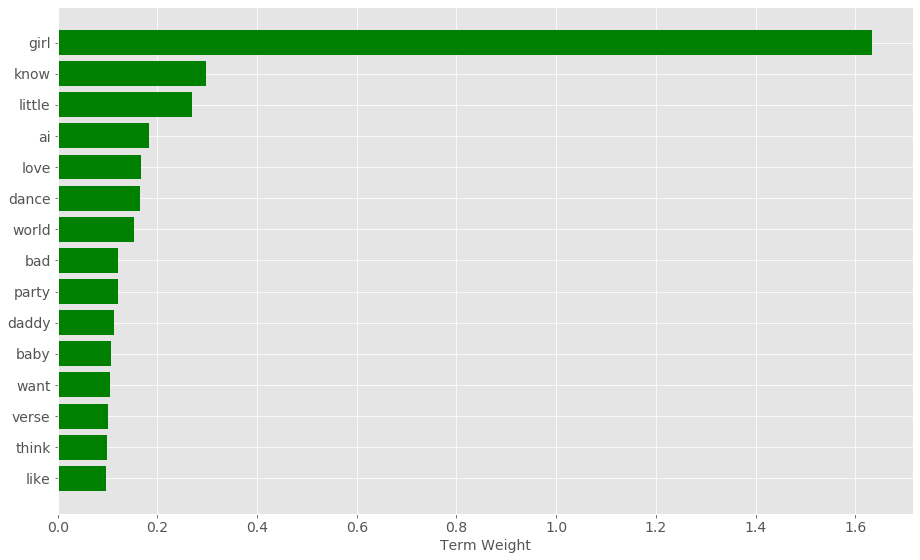

In [218]:
plot_top_term_weights( terms, H, 6, 15 )

In [219]:
# Wenn dieses Themenmodell für spätere Benutzer behalten werden soll, 
# kann man es mit Hilfe der joblib speichern.

joblib.dump((W,H,terms,snippets), "articles-model-nmf-k%02d.pkl" % k)

['articles-model-nmf-k10.pkl']

## Parameterauswahl für NMF

Nun soll die fortgeschrittenere Aufgabe der Parameterauswahl für die NMF-Themenmodellierung betrachtet werden - nämlich die Auswahl eines nützlichen Wertes für die Anzahl der Themen k.

Zuerst wird die TF-IDF normalisierte Dokument-Begriffsmatrix und die Liste der Begriffe, die wir zuvor mit Joblib gespeichert haben geladen.


In [220]:
from sklearn.externals import joblib
(A,terms,snippets) = joblib.load( "articles-tfidf.pkl" )
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Loaded 1038 X 22624 document-term matrix


### Erstellen der Themenmodelle

Ein üblicher Ansatz für die Parameterauswahl besteht darin, die Themenkohärenz von Modellen zu messen und zu vergleichen, die für verschiedene Werte von k generiert wurden.

Man beginnt damit, einen anfänglichen Bereich "sinnvoller" Werte vorzugeben.

In [221]:
kmin, kmax = 4, 15

In [222]:
#Anwenden des NMFs für jeden dieser Werte.

from sklearn import decomposition
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = decomposition.NMF( init="nndsvd", n_components=k ) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...
Applying NMF for k=11 ...
Applying NMF for k=12 ...
Applying NMF for k=13 ...
Applying NMF for k=14 ...
Applying NMF for k=15 ...


### Erstellen des Word Embedding

Um die Anzahl der Themen auszuwählen, wird hier ein Themenkohärenzmaß namens TC-W2V verwendet. Dieses Maß beruht auf der Verwendung eines Worteinbettungsmodells, das aus dem entsprechenden Korpus konstruiert wurde. In diesem Schritt wird also die Gensim-Implementierung von Word2Vec verwendet, um auf der Grundlage unserer Sammlung von Songtexten ein Word2Vec-Modell zu erstellen.

In [223]:
#raw_documents = df['text'].to_list()
print("Read %d raw text documents" % len(raw_documents))

Read 1038 raw text documents


In [224]:
#Einlesen der Stopwortliste.

#custom_stop_words = []
#with open( "stopwords.txt", "r", encoding = "utf8" ) as fin:
    #for line in fin.readlines():
        #custom_stop_words.append( line.strip().lower() )
# note that we need to make it hashable
print("Stopword list has %d entries" % len(stop_words))

Stopword list has 179 entries


In [225]:
#Zunächst muss man eine Klasse definieren, die Dokumente in einer Form erzeugt, 
#die von der Word2Vec-Implementierung von Gensim verwendet werden kann.

import re
class TokenGenerator:
    def __init__( self, raw_documents, stop_words ):
        self.documents = raw_documents
        self.stopwords = stop_words
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens

In [226]:
#Erstellen mit Gensim ein Skipgram Word2Vec-Modell aus allen Dokumenten in der Eingabedatei.

import gensim
docgen = TokenGenerator( raw_documents, stop_words)
# das Modell hat 500 Dimensionen, die minimale Dokument-Begriffshäufigkeit beträgt 20
w2v_model = gensim.models.Word2Vec(docgen, min_count=1, size=500)

Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...


In [227]:
print("Model has %d terms" % len(w2v_model.wv.vocab))

Model has 22625 terms


In [228]:
#Erstelltes Model abspeichern.

w2v_model.save("w2v-model.bin")

## Auswahl der Anzahl der Themen

Sobald man ein Word2vec-Modell hat, kann man es als Teil eines Themenkohärenz-Ansatzes verwenden, um die verschiedenen NMF-Themenmodelle zu evaluieren, die man zuvor erstellt hat. Zu diesem Zweck wird eine einfache Version des TC-W2V-Kohärenzmaßes implementiert.

In [229]:
#Es wird das Word2vec-Modell zur Berechnung der Kohärenz-Scores für jedes dieser Modelle 
#verwendet.
#Man definiert diesen Kohärenz-Score wie folgt:


def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # jedes Begriffspaar prüfen
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            pair_scores.append( w2v_model.similarity(pair[0], pair[1]) )
        # den Mittelwert für alle Paare in diesem Thema ermitteln
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # den Mittelwert über alle Themen erhalten
    return overall_coherence / len(term_rankings)

In [230]:
#Man definiert auch eine Funktion, um den Themendeskriptor (d.h. die Liste der Oberbegriffe) 
#für jedes Thema zu erhalten:

import numpy as np
def get_descriptor( all_terms, H, topic_index, top ):
    # die Werte umgekehrt sortieren, um die Indizes zu sortieren
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # nun erhält man die Begriffe, die den Indizes mit dem höchsten Rang entsprechen
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

In [231]:
#Nun wird jedes der Modelle für verschiedene Werte von k verarbeitet.

from itertools import combinations
k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Erhalt aller Themendeskriptoren - die term_rankings, basierend auf den Top-10-Begriffen
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Berechnung der Kohärenz auf der Grundlage unseres Word2vec-Modells
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

K=04: Coherence=0.3601
K=05: Coherence=0.3462
K=06: Coherence=0.3668
K=07: Coherence=0.3592
K=08: Coherence=0.3537
K=09: Coherence=0.3394
K=10: Coherence=0.3265
K=11: Coherence=0.3187
K=12: Coherence=0.3082
K=13: Coherence=0.3095
K=14: Coherence=0.3054
K=15: Coherence=0.3097


In [232]:
#Erstellung mit Hilfe der Matplotlib ein Liniendiagramm dieser Kohärenz-Scores, 
#das bei der Auswahl eines geeigneten Wertes hilft.

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

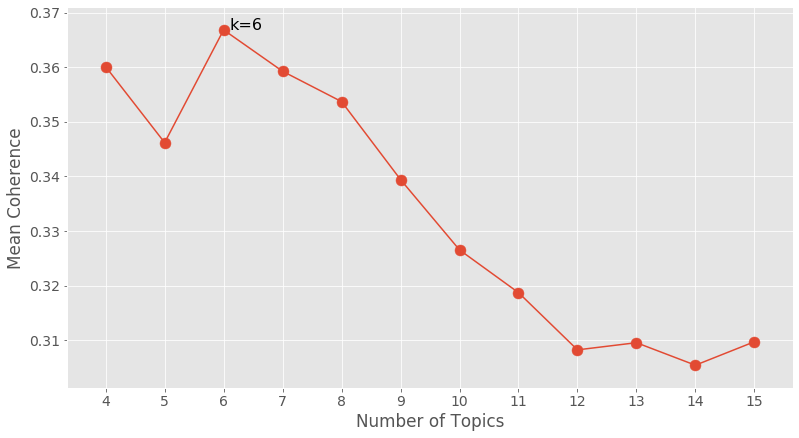

In [233]:
fig = plt.figure(figsize=(13,7))
# das Liniendiagramm erstellen
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# die Punkte hinzufügen
plt.scatter( k_values, coherences, s=120)
# den maximalen Punkt auf der Parzelle finden und kommentieren
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
plt.show()

## Examine the Final Model

Das obige Diagramm legt nahe, dass der geeignetste Wert für die Anzahl der Themen k=8 ist.

In [234]:
k = best_k
# Laden des Modells, das wir zuvor erstellt haben.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]

In [235]:
#Anzeigen der Themendeskriptoren für dieses Modell.

for topic_index in range(k):
    descriptor = get_descriptor( terms, H, topic_index, 10 )
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: know, time, want, way, life, need, heart, everything, tonight, nothing
Topic 02: nigga, shit, bitch, ai, fuck, ass, money, niggas, wit, get
Topic 03: baby, girl, want, ai, little, know, love, honey, good, tonight
Topic 04: love, heart, life, need, know, feel, time, lonely, night, say
Topic 05: man, old, little, ai, good, woman, town, time, big, night
Topic 06: life, world, blood, time, heart, death, soul, light, way, end
